In [65]:
import qiskit as q
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import AerProvider

provider = AerProvider()

statevector_sim = provider.get_backend("statevector_simulator")
qasm_sim = provider.get_backend("qasm_simulator")


In [66]:
def do_job(circuit):
    result = statevector_sim.run(circuit).result()
    statevec = result.get_statevector()

    circuit.measure_all()

    qasm = qasm_sim.run(circuit, shots=1024).result()
    counts = qasm.get_counts()

    return statevec, counts

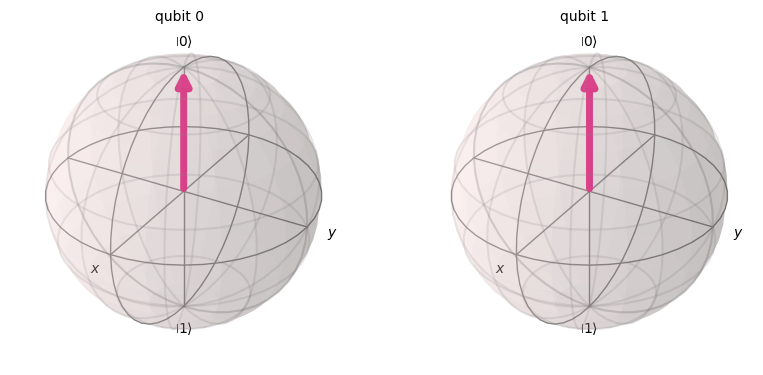

In [70]:
circuit = q.QuantumCircuit(2, 2)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

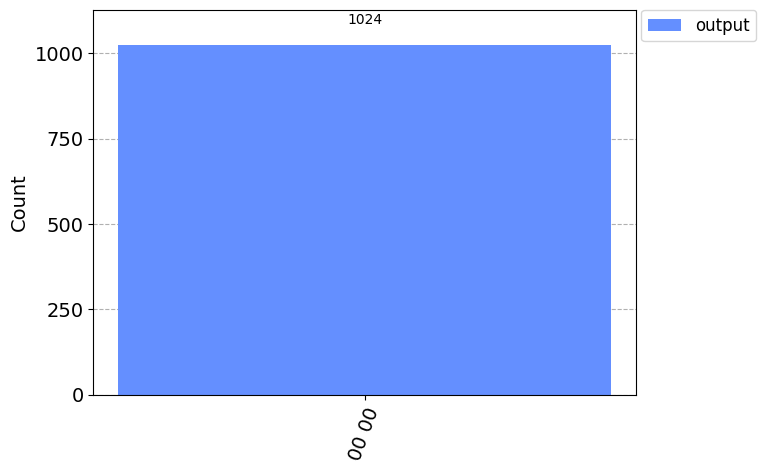

In [72]:
plot_histogram([counts], legend=["output"])

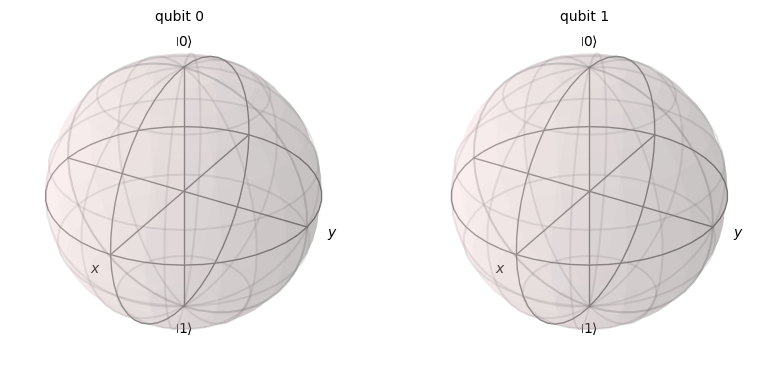

In [82]:
circuit = q.QuantumCircuit(2, 2)

circuit.h(0)
circuit.cx(0, 1)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

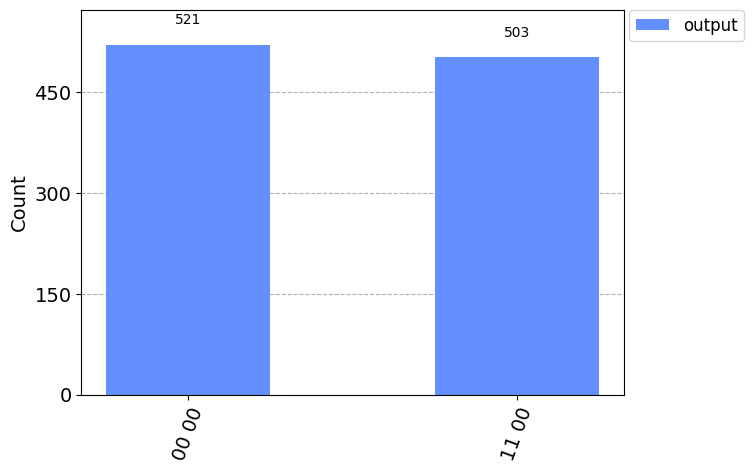

In [83]:
plot_histogram([counts], legend=["output"])
